## Exploratory Data Analysis Project : Goodreads Choice Awards Best Books of 2023 Case Study

**OBJECTIVE** : To analyze what readers like the most in terms of ratings and reviews.

**DESCRIPTION** : The project focused on analyzing a dataset of books in 2023. The dataset included book title, ratings, reviews, book category, price and other relevant information. The project involved loading the data, cleaning and preprocessing it, performing exploratory data analysis (EDA), analyzing the correlation between readers choice vote, number of reviews and number of rating.

**SKILLS** : Data cleaning, correlation matrices, data visualization.

**TECHNOLOGY** : Python, Pandas, Numpy, Seaborn, Matplotlib.

**RESULTS** : Using python functions the analysis revealed that the Romance category have the highest votes for best book of 2023. from the matrix, The Readers Choice Votes have high correlations between Number of Reviews and Number of Ratings.






In [34]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv("Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv")

#show the samples of the data
df.head(5)

,source_URL,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,Book Description,First Published date,Kindle Version and Price,Kindle Price,About the Author
0,https://www.goodreads.com/book/show/62047984-y...,200722,Fiction,Yellowface,R.F. Kuang,3.87,"252,189","37,032",336,Hardcover,Athena Liu is a literary darling and June Hayw...,25-May-23,Kindle $14.99,14.99,"Rebecca F. Kuang is a Marshall Scholar, transl..."
1,https://www.goodreads.com/book/show/61771675-h...,60171,Fiction,Hello Beautiful,Ann Napolitano,4.20,"200,304","19,288",416,Kindle Edition,An emotionally layered and engrossing story of...,14-Mar-23,Kindle $2.99,2.99,"Ann Napolitano’s new novel, Hello Beautiful, h..."
2,https://www.goodreads.com/book/show/62926992-t...,57702,Fiction,The Wishing Game,Meg Shaffer,4.19,"62,142","10,594",304,Hardcover,Make a wish. . . .Lucy Hart knows better than ...,30-May-23,Kindle $2.99,2.99,Meg Shaffer is a film student in TV and Screen...
3,https://www.goodreads.com/book/show/63241104-t...,53470,Fiction,Tom Lake,Ann Patchett,4.13,"127,318","16,108",309,Hardcover,This is a story about Peter Duke who went on t...,1-Aug-23,Kindle $15.99,15.99,"Patchett was born in Los Angeles, California. ..."
4,https://www.goodreads.com/book/show/62873996-t...,45859,Fiction,The Five-Star Weekend,Elin Hilderbrand,4.11,"116,619","8,141",384,Hardcover,From the #1 New York Times bestselling author ...,13-Jun-23,Kindle $14.99,14.99,Elin Hilderbrand lives on Nantucket with her h...


<h4>Data Processing & Cleaning

In [36]:
#The unused columns are source_URL, Book Description, and About Author
df.drop(['source_URL','Book Description','About the Author'], axis=1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Readers Choice Votes      299 non-null    int64  
 1   Readers Choice Category   299 non-null    object 
 2   Title                     299 non-null    object 
 3   Author                    299 non-null    object 
 4   Total Avg Rating          299 non-null    float64
 5   Number of Ratings         299 non-null    object 
 6   Number of Reviews         299 non-null    object 
 7   Number of Pages           299 non-null    int64  
 8   Edition                   299 non-null    object 
 9   First Published date      299 non-null    object 
 10  Kindle Version and Price  299 non-null    object 
 11  Kindle Price              299 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 28.2+ KB


In [38]:
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Pages,Kindle Price
count,299.000000,299.000000,299.000000,299.000000
mean,19662.919732,4.063512,392.394649,11.327926
std,32406.337679,0.252188,123.698044,5.351909
min,935.000000,3.520000,192.000000,0.000000
25%,3591.000000,3.855000,320.000000,9.990000
50%,10099.000000,4.060000,368.000000,13.990000
75%,24714.000000,4.250000,432.000000,14.990000
max,397565.000000,4.750000,1242.000000,17.990000


<h4> Convert the data type

In [39]:
numeric_columns = ['Number of Ratings', 'Number of Reviews']

#remove the character comma from those columns and convert to Int32
for column in numeric_columns:
    df[column] = df[column].replace(',', '', regex=True).astype('int32')

In [40]:
#convert the rest of the columns to correct data types
convert_dict = {'Readers Choice Votes' : 'int32',
                'Readers Choice Category' : 'category',
                'Title' : 'string',
                'Author' : 'string',
                'Total Avg Rating' : 'float16',
                'Number of Pages' : 'int16',
                'Edition' : 'category',
                'First Published date' : 'datetime64[ns]',
                'Kindle Price' : 'float16'}
df = df.astype(convert_dict)

In [41]:
#separate the currency from the text and put it in the new column
df['Kindle Version'] = df['Kindle Version and Price'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

#change the column into correct data type
df['Kindle Version'] = df['Kindle Version'].astype('category')

#remove the previous column
df = df.drop('Kindle Version and Price', axis=1)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Readers Choice Votes     299 non-null    int32         
 1   Readers Choice Category  299 non-null    category      
 2   Title                    299 non-null    string        
 3   Author                   299 non-null    string        
 4   Total Avg Rating         299 non-null    float16       
 5   Number of Ratings        299 non-null    int32         
 6   Number of Reviews        299 non-null    int32         
 7   Number of Pages          299 non-null    int16         
 8   Edition                  299 non-null    category      
 9   First Published date     299 non-null    datetime64[ns]
 10  Kindle Price             299 non-null    float16       
 11  Kindle Version           299 non-null    category      
dtypes: category(3), datetime64[ns](1), f

In [43]:
df.describe()

,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,First Published date,Kindle Price
count,299.000000,299.000000,299.000000,299.000000,299.000000,299,299.000000
mean,19662.919732,4.062500,38748.351171,5241.705686,392.394649,2023-05-19 09:57:11.438127104,11.328125
min,935.000000,3.519531,228.000000,71.000000,192.000000,2019-11-27 00:00:00,0.000000
25%,3591.000000,3.854492,5516.500000,952.000000,320.000000,2023-02-28 12:00:00,9.992188
50%,10099.000000,4.058594,14519.000000,2469.000000,368.000000,2023-05-16 00:00:00,13.992188
75%,24714.000000,4.250000,37143.000000,5109.500000,432.000000,2023-08-29 00:00:00,14.992188
max,397565.000000,4.750000,930928.000000,141668.000000,1242.000000,2023-11-13 00:00:00,17.984375
std,32406.337679,0.252197,79586.655592,10800.069660,123.698044,NaN,5.351562


In [44]:
df.sample(10)

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Price,Kindle Version
264,17288,History & Biography,Black AF History: The Un-Whitewashed Story of ...,Michael Harriot,4.519531,976,217,432,Hardcover,2023-09-19,13.992188,Kindle
165,25890,Young Adult Fantasy & Science Fiction,What the River Knows,Isabel Ibañez,4.000000,10148,3160,416,Hardcover,2023-10-31,11.992188,Kindle
293,2969,Humor,Surely You Can't Be Serious: The True Story of...,David Zucker|Jim Abrahams|Jerry Zucker,4.250000,844,198,352,Hardcover,2023-10-03,16.984375,Kindle
127,17140,Science Fiction,The Ferryman,Justin Cronin,3.949219,22361,3448,538,Hardcover,2023-05-02,13.992188,Kindle
25,29977,Historical Fiction,The Echo of Old Books,Barbara Davis,4.339844,45487,3439,431,Kindle Edition,2023-03-28,0.000000,Kindle Unlimited
181,65748,Young Adult Fiction,The Brothers Hawthorne,Jennifer Lynn Barnes,4.011719,40442,5814,480,Hardcover,2023-08-29,12.992188,Kindle
49,20704,Mystery & Thriller,All the Sinners Bleed,S.A. Cosby,4.289062,31916,4407,341,Hardcover,2023-06-06,14.992188,Kindle
138,1388,Science Fiction,The Jinn-Bot of Shantiport,Samit Basu,3.699219,450,181,404,Hardcover,2023-10-03,14.992188,Kindle
209,7645,Debut Novel,Chain-Gang All-Stars,Nana Kwame Adjei-Brenyah,4.140625,18928,3696,367,Hardcover,2023-05-02,13.992188,Kindle
246,13235,Memoir & Autobiography,"Love, Pamela",Pamela Anderson,3.779297,22882,2691,256,Hardcover,2023-01-31,12.992188,Kindle


<h4> Analyzing and Visualizing Data

1.1 Category Distribution

Readers Choice Category
Fantasy                                  20
Fiction                                  20
Historical Fiction                       20
History & Biography                      20
Horror                                   20
Humor                                    20
Memoir & Autobiography                   20
Mystery & Thriller                       20
Nonfiction                               20
Romance                                  20
Romantasy                                20
Science Fiction                          20
Young Adult Fantasy & Science Fiction    20
Young Adult Fiction                      20
Debut Novel                              19
Name: count, dtype: int64


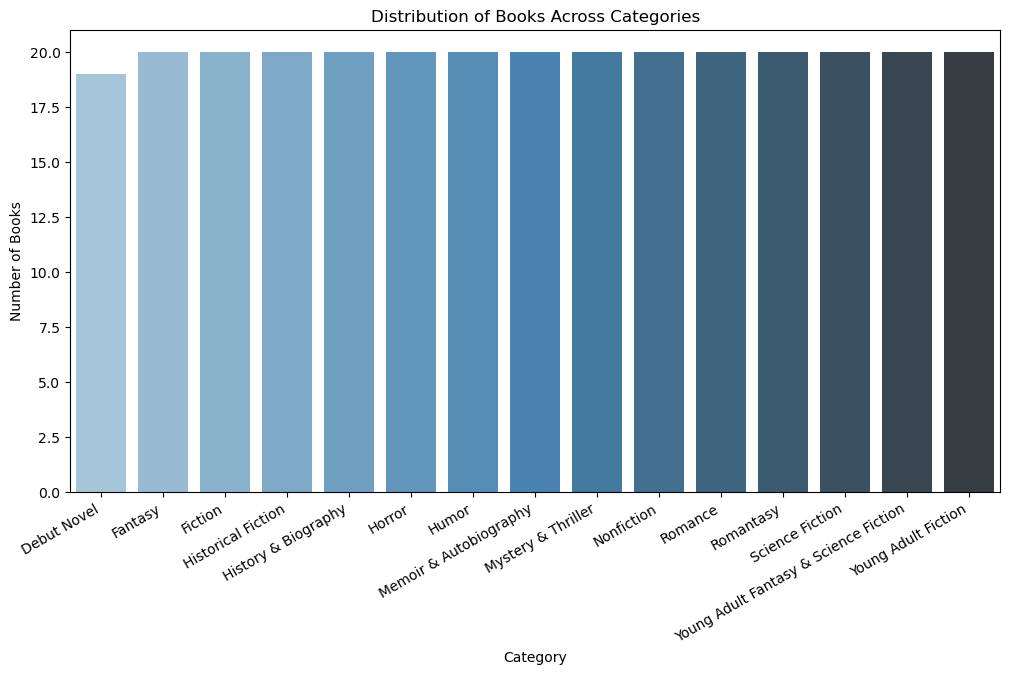

In [45]:
cat_counts = df['Readers Choice Category'].value_counts()
print(cat_counts)

plt.figure(figsize=(12,6))
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette='Blues_d')
plt.title('Distribution of Books Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=30, ha='right')
plt.show()

**Observation** : Our data is evenly distributed across all categories, with an exception of Debut Novel category that only has 19 books.

The distribution of votes, ratings, review, page, and price for each category. Using boxplot for plotting

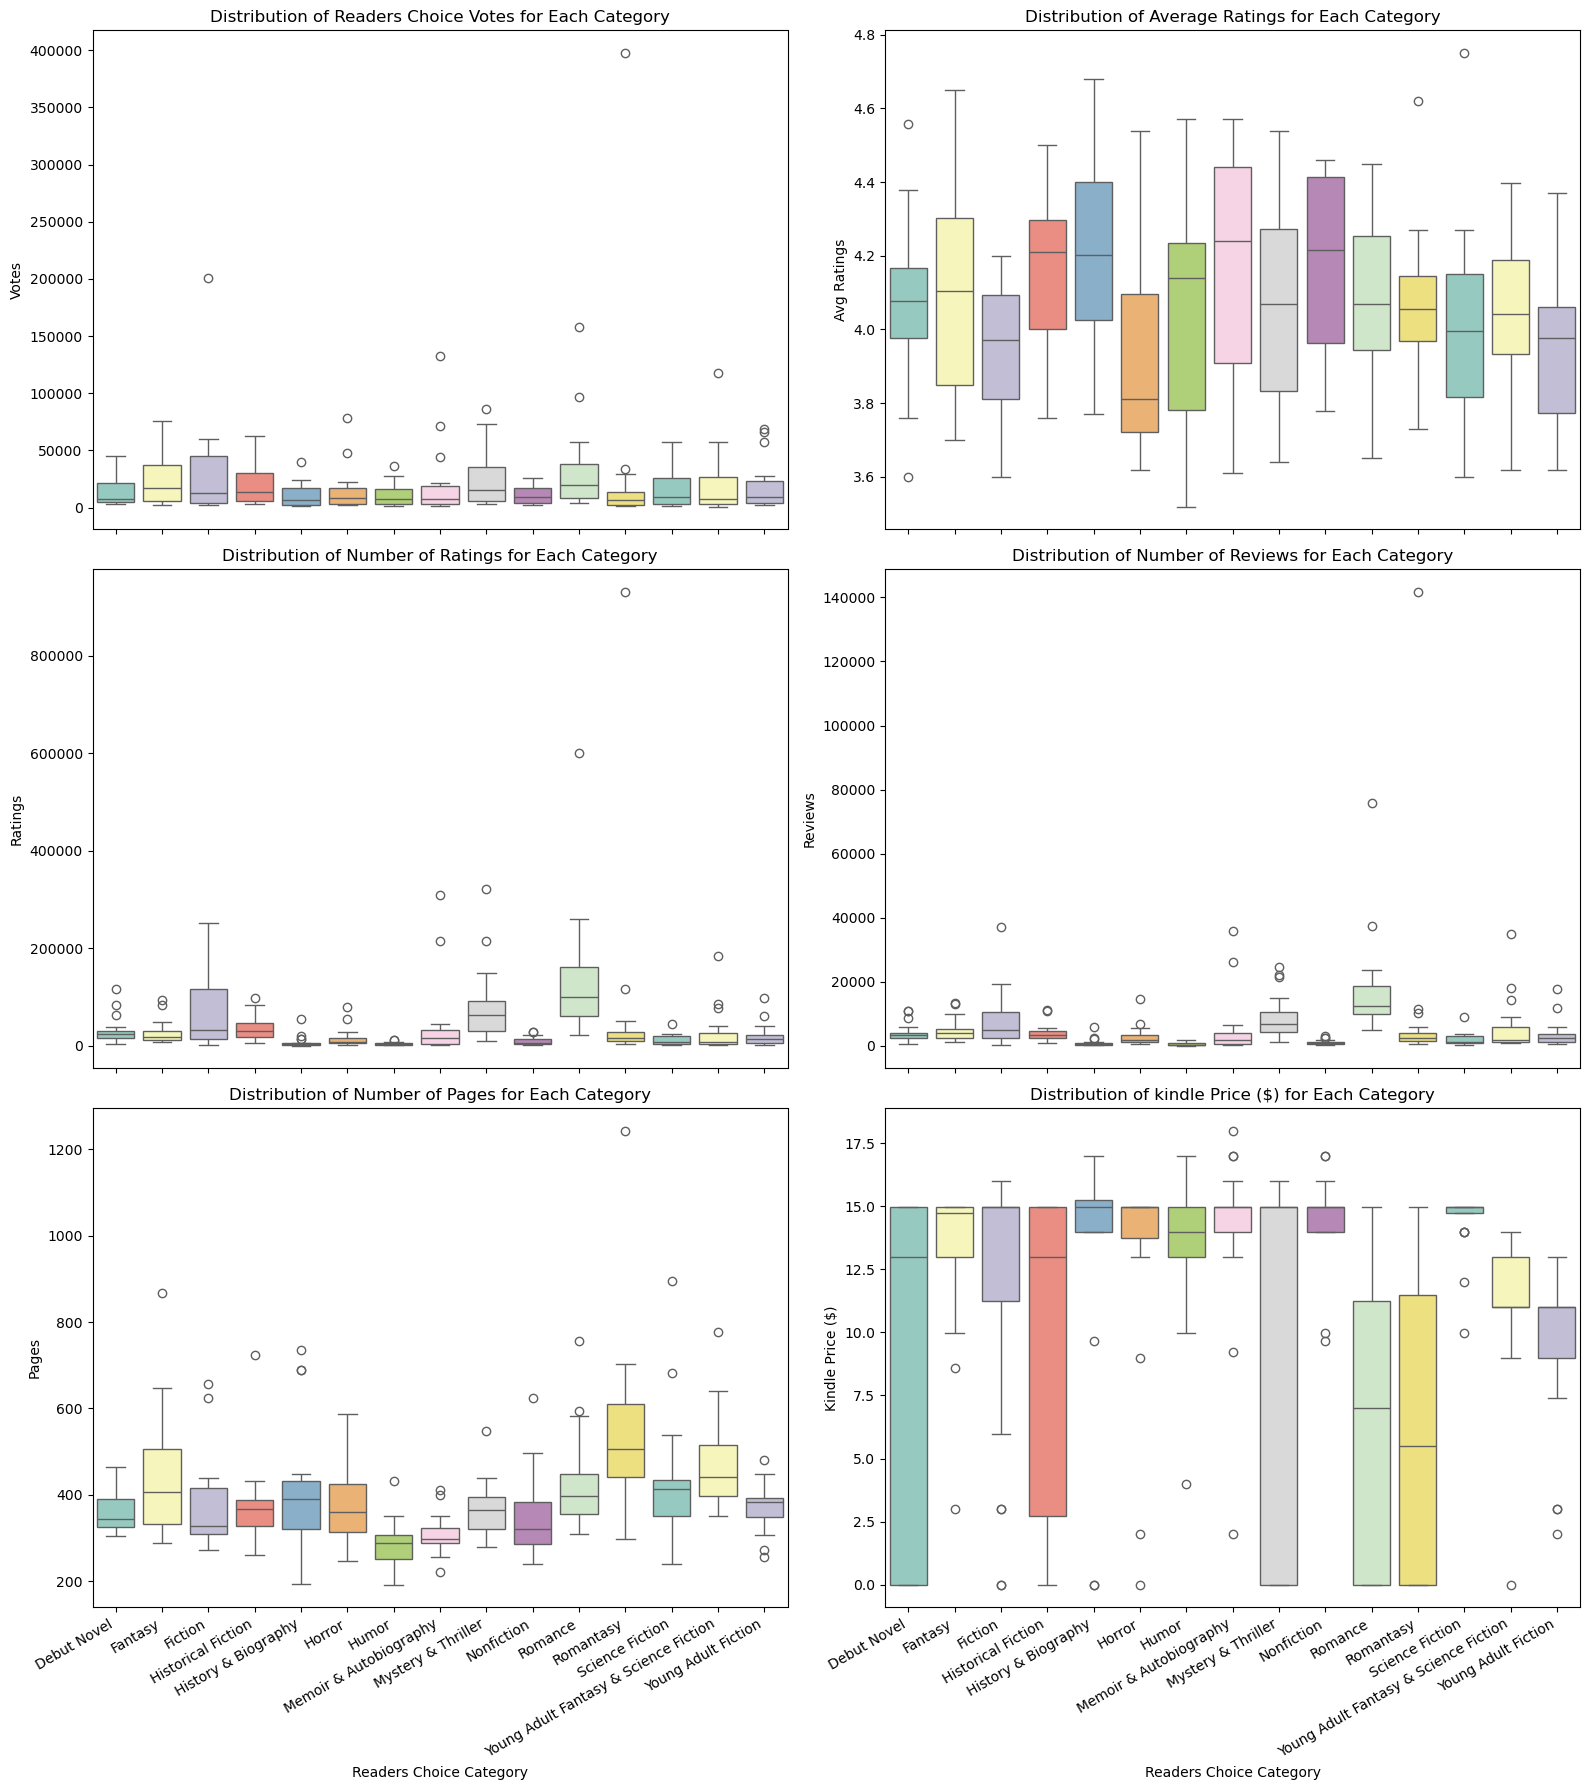

In [46]:
fig, axes = plt.subplots(3,2, figsize = (16,18), sharey = False, sharex = True)

#First plot Distribution of Readers Choice Votes
sns.boxplot(data = df, x='Readers Choice Category', y='Readers Choice Votes', palette='Set3', ax=axes[0,0])
axes[0,0].set_title('Distribution of Readers Choice Votes for Each Category')
axes[0,0].set_ylabel('Votes')

#Second plot Distribution of Average Ratings
sns.boxplot(data = df, x='Readers Choice Category', y='Total Avg Rating', palette='Set3', ax=axes[0,1])
axes[0,1].set_title('Distribution of Average Ratings for Each Category')
axes[0,1].set_ylabel('Avg Ratings')

#Third plot Distribution of Number of Ratings
sns.boxplot(data = df, x='Readers Choice Category', y='Number of Ratings', palette='Set3', ax=axes[1,0])
axes[1,0].set_title('Distribution of Number of Ratings for Each Category')
axes[1,0].set_ylabel('Ratings')

#Fourth plot Distribution of Number of Reviews
sns.boxplot(data = df, x='Readers Choice Category', y='Number of Reviews', palette='Set3', ax=axes[1,1])
axes[1,1].set_title('Distribution of Number of Reviews for Each Category')
axes[1,1].set_ylabel('Reviews')

#Fifth plot Distribution of Number of Pages
sns.boxplot(data = df, x='Readers Choice Category', y='Number of Pages', palette='Set3', ax=axes[2,0])
axes[2,0].set_title('Distribution of Number of Pages for Each Category')
axes[2,0].set_ylabel('Pages')

#Sixth plot Distribution of Kindle Price
sns.boxplot(data = df, x='Readers Choice Category', y='Kindle Price', palette='Set3', ax=axes[2,1])
axes[2,1].set_title('Distribution of kindle Price ($) for Each Category')
axes[2,1].set_ylabel('Kindle Price ($)')

for ax in axes[2, :]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

fig.tight_layout()
plt.show()    

1.2 Analyzing by Category

analyze by category from votes, ratings, reviews, pages and price, and find out the Most Popular Category in 2023

In [47]:
#Determine which column we want to aggregate
aggregations = { 'Readers Choice Votes' : 'sum',
                  'Total Avg Rating' : 'mean',
                  'Number of Ratings' : 'sum',
                  'Number of Reviews' : 'sum',
                  'Number of Pages' : 'median',
                  'Kindle Price' : 'median',
                }
#Group by book category
category_vote = df.groupby('Readers Choice Category').agg(aggregations).sort_values('Readers Choice Votes', ascending=False)

#Calculate the percentage of total votes, total ratings, and total reviews for each category
total_votes = category_vote['Readers Choice Votes'].sum()
total_ratings = category_vote['Number of Ratings'].sum()
total_reviews = category_vote['Number of Reviews'].sum()
percent_of_total_votes = (category_vote['Readers Choice Votes']/ total_votes) * 100
percent_of_total_ratings = (category_vote['Number of Ratings']/ total_ratings) * 100
percent_of_total_reviews = (category_vote['Number of Reviews']/ total_reviews) * 100

#Create new DataFrame of Votes, Ratings, and Reviews
result_df = pd.DataFrame({
    'Votes(sum)' : category_vote['Readers Choice Votes'],
    '% Votes' : percent_of_total_votes,
    'Avg Ratings' : category_vote['Total Avg Rating'].round(2),
    'Number of Ratings' : category_vote['Number of Ratings'],
    '% of Total Ratings' : percent_of_total_ratings.round(2),
    'Number of Reviews' : category_vote['Number of Reviews'],
    '% of Total Reviews': percent_of_total_reviews.round(2),
    'Median Pages' : category_vote['Number of Pages'],
    'Median Kindle Price' : category_vote['Kindle Price'].round(2)
    })

#Find the most voted category
max_voted_cat = result_df['Votes(sum)'].idxmax()
max_votes = result_df['Votes(sum)'].max()
avg_rat = result_df.loc[max_voted_cat, 'Avg Ratings']

#Find the most rated category
max_rated_cat = result_df['Number of Ratings'].idxmax()
max_rates = result_df['Number of Ratings'].max()
pct_max_rates = result_df['% of Total Ratings'].max()

#Find the most reviewed category
max_reviewed_cat = result_df['Number of Reviews'].idxmax()
max_reviews = result_df['Number of Reviews'].max()
pct_max_reviews = result_df['% of Total Reviews'].max()

#Print the result
print(f"The category '{max_voted_cat}' is The Most Voted Category of 2023, with {max_votes:,} votes")
print(f"The category '{max_rated_cat}' is The Most Rated Category of 2023, having an average rating of {format(avg_rat, '.2f')}, and number of ratings: {max_rates:,}, or {format(pct_max_rates, '.2f')}% of total ratings")
print(f"The category '{max_reviewed_cat}' is The Most Reviewed Category of 2023, with {max_reviews:,} number of reviews or {format(pct_max_reviews, '.2f')}% of total reviews")

result_df


The category 'Romance' is The Most Voted Category of 2023, with 645,601 votes
The category 'Romance' is The Most Rated Category of 2023, having an average rating of 4.05, and number of ratings: 2,737,676, or 23.63% of total ratings
The category 'Romance' is The Most Reviewed Category of 2023, with 336,747 number of reviews or 21.49% of total reviews


,Votes(sum),% Votes,Avg Ratings,Number of Ratings,% of Total Ratings,Number of Reviews,% of Total Reviews,Median Pages,Median Kindle Price
Readers Choice Category,,,,,,,,,
Romance,645601,10.981079,4.05,2737676,23.63,336747,21.49,398.0,6.99
Fiction,587718,9.996542,3.95,1288841,11.12,157445,10.05,328.0,14.99
Romantasy,572812,9.743005,4.07,1387830,11.98,203928,13.01,506.0,5.49
Mystery & Thriller,519745,8.840384,4.05,1673792,14.45,181312,11.57,365.5,14.99
Fantasy,456020,7.756480,4.10,523942,4.52,93625,5.97,407.5,14.73
Young Adult Fantasy & Science Fiction,400863,6.818311,4.04,543467,4.69,113098,7.22,440.0,10.99
Historical Fiction,390321,6.639001,4.14,692953,5.98,79846,5.09,368.0,12.99
Memoir & Autobiography,389374,6.622893,4.17,814014,7.03,99369,6.34,298.5,14.99
Young Adult Fiction,371283,6.315182,3.97,392355,3.39,73957,4.72,384.0,10.99


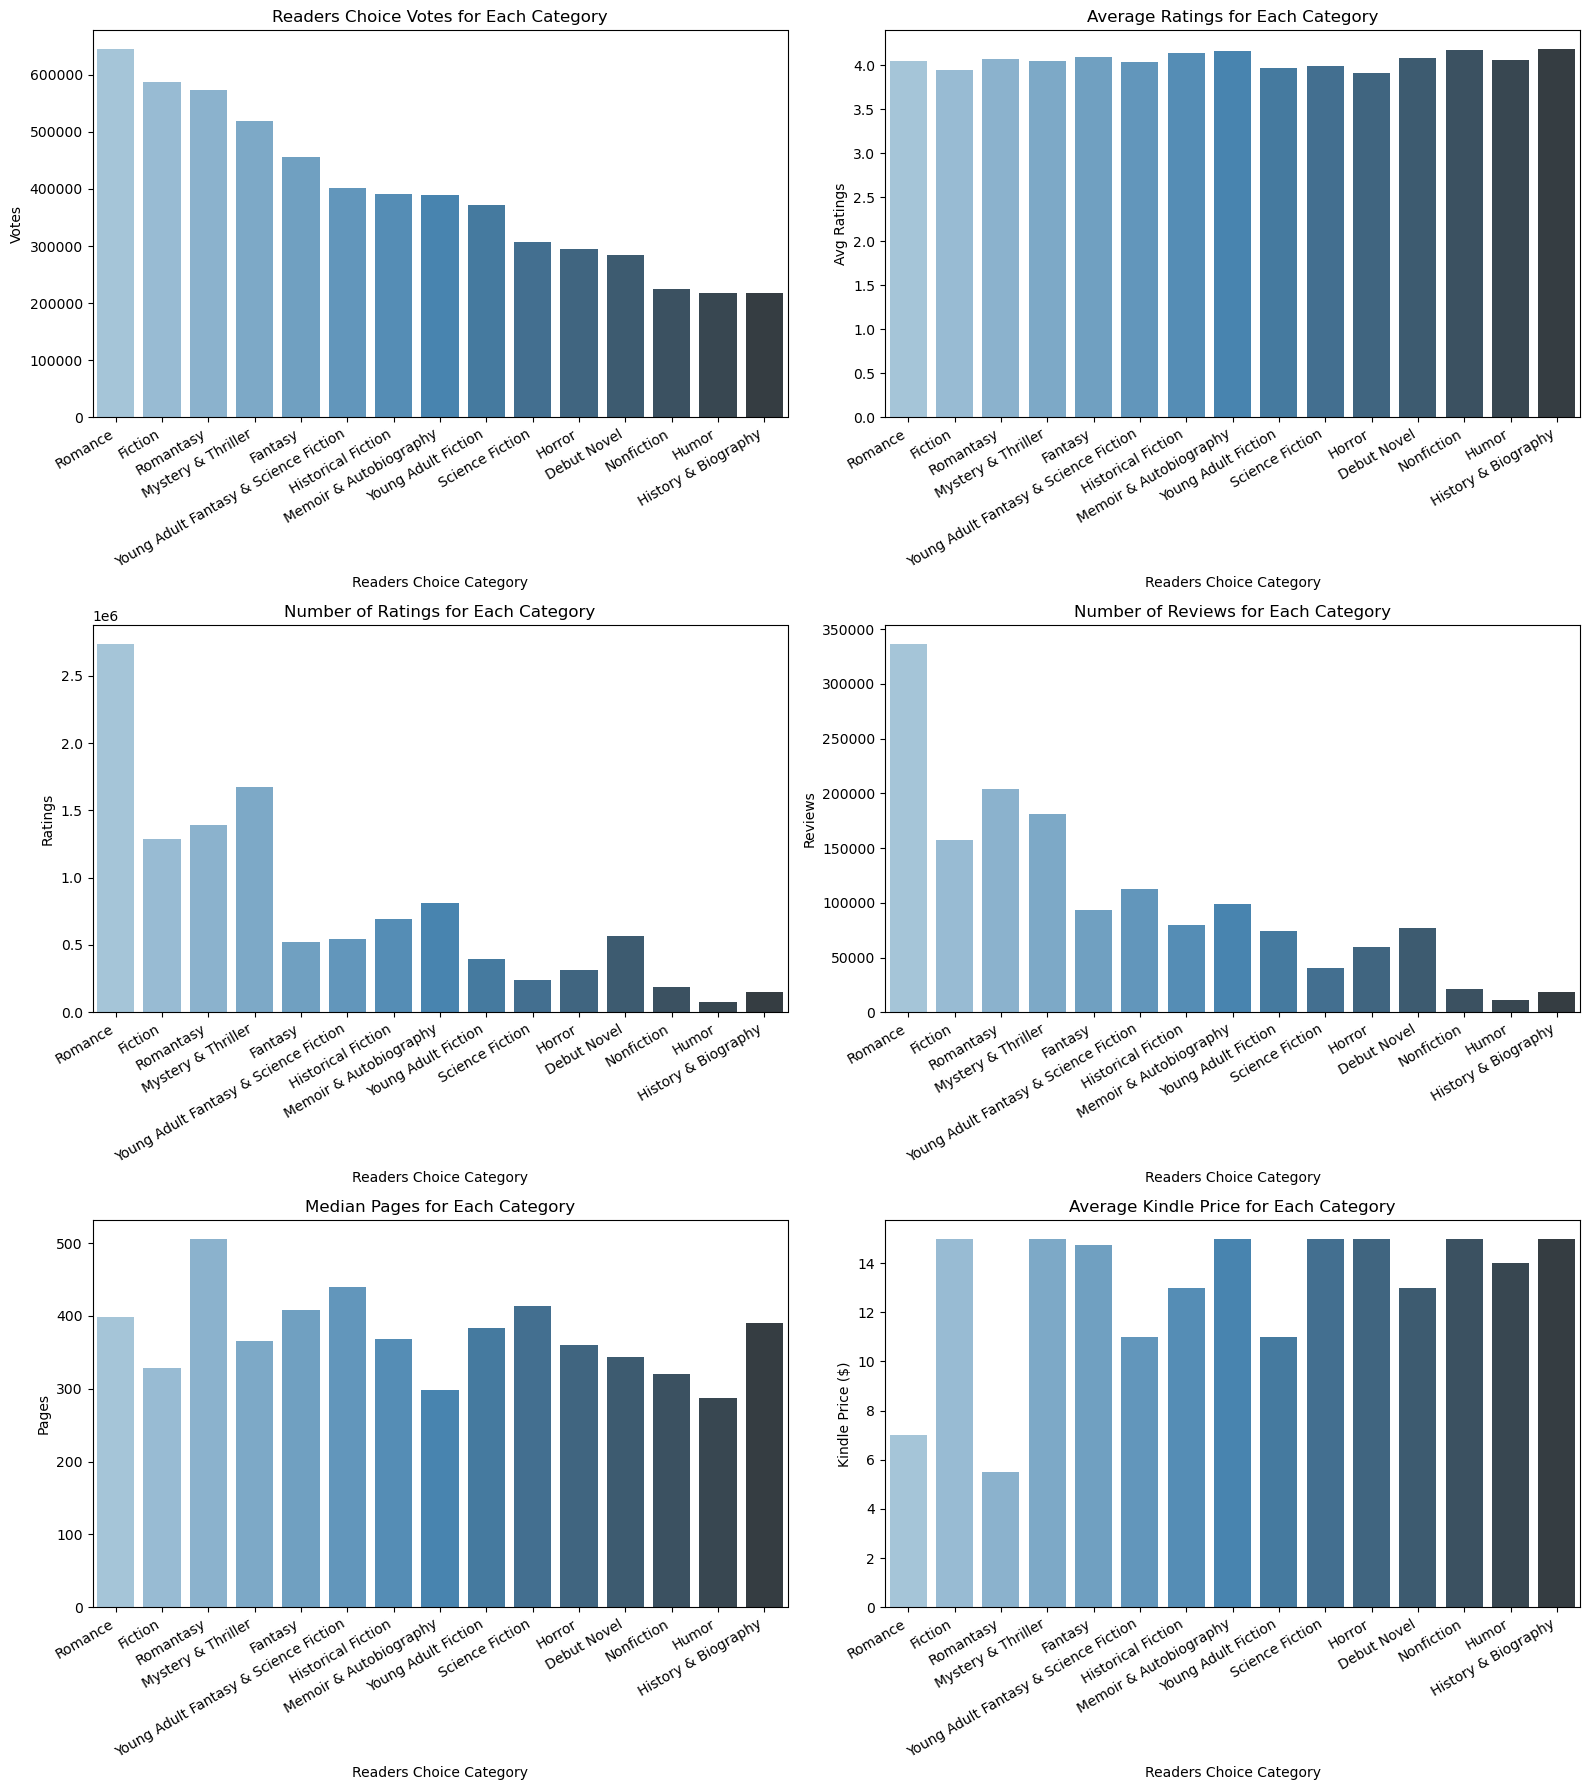

In [48]:
#Visualize the new DataFrame
fig , axes = plt.subplots(3,2, figsize = (16,18), sharey = False)

#First plot
sns.barplot(x=result_df.index, y=result_df['Votes(sum)'], palette='Blues_d', order=result_df.index, ax=axes[0,0])
axes[0,0].set_title('Readers Choice Votes for Each Category')
axes[0,0].set_ylabel('Votes')
axes[0,0].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

#Second plot
result_df_sorted = result_df.sort_values(by = 'Avg Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Avg Ratings'], palette='Blues_d',order=result_df.index, ax=axes[0,1])
axes[0,1].set_title('Average Ratings for Each Category')
axes[0,1].set_ylabel('Avg Ratings')
axes[0,1].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

#Third plot
result_df_sorted = result_df.sort_values(by = 'Number of Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Number of Ratings'], palette='Blues_d',order=result_df.index, ax=axes[1,0])
axes[1,0].set_title('Number of Ratings for Each Category')
axes[1,0].set_ylabel('Ratings')
axes[1,0].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

#Fourth plot
result_df_sorted = result_df.sort_values(by = 'Number of Reviews', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Number of Reviews'], palette='Blues_d',order=result_df.index, ax=axes[1,1])
axes[1,1].set_title('Number of Reviews for Each Category')
axes[1,1].set_ylabel('Reviews')
axes[1,1].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

#Fifth plot
result_df_sorted = result_df.sort_values(by = 'Median Pages', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Pages'], palette='Blues_d',order=result_df.index, ax=axes[2,0])
axes[2,0].set_title('Median Pages for Each Category')
axes[2,0].set_ylabel('Pages')
axes[2,0].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

#Sixth plot
result_df_sorted = result_df.sort_values(by = 'Median Kindle Price', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Kindle Price'], palette='Blues_d',order=result_df.index, ax=axes[2,1])
axes[2,1].set_title('Average Kindle Price for Each Category')
axes[2,1].set_ylabel('Kindle Price ($)')
axes[2,1].set_xticklabels(labels=result_df.index, rotation=30, ha='right')

plt.tight_layout()
plt.show()

**Observation** :
1) Romance takes the title as the Most Popular Book Category in 2023, surpassing others categories in votes, ratings, and reviews.
2) Humor and History & Biography ranked as the two least popular book categories in 2023.

Finding Correlations. 

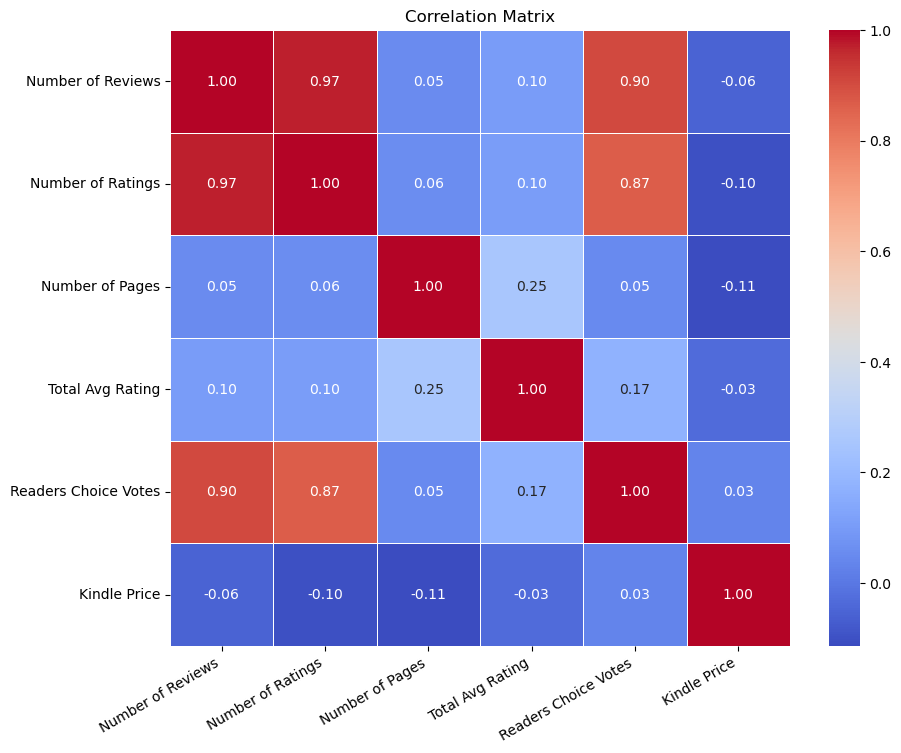

In [49]:
#Assign the columns
columns_of_interst = ['Number of Reviews', 'Number of Ratings', 'Number of Pages', 'Total Avg Rating', 'Readers Choice Votes', 'Kindle Price']

#Calculate the correlation matrix
correlation_matrix = df[columns_of_interst].corr()

#Display the correlation matrix
plt.figure(figsize =(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

**Observation** :
1) The Readers Choice Votes have high correlations between Number of Reviews and Number of Ratings.
2) Pages and price don't have strong connection between votes, ratings and reviews.

1.3 Analyzing by Books

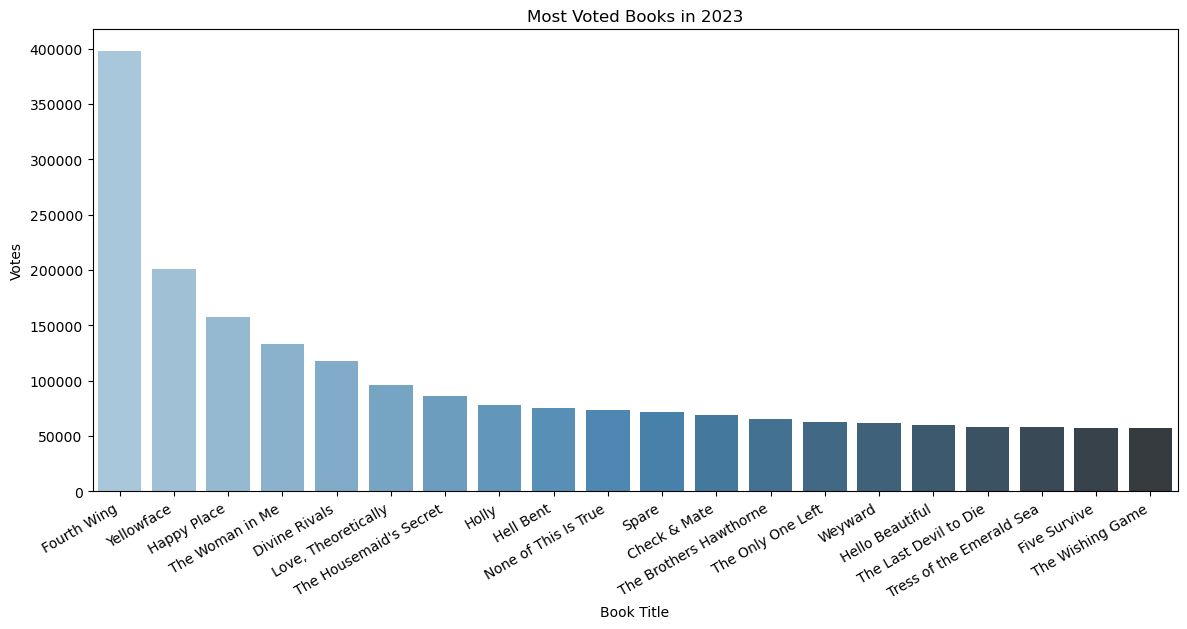

,Title,Readers Choice Category,Readers Choice Votes,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages
80,Fourth Wing,Romantasy,397565,4.621094,930928,141668,500
0,Yellowface,Fiction,200722,3.869141,252189,37032,336
60,Happy Place,Romance,157687,4.050781,599665,75814,400
239,The Woman in Me,Memoir & Autobiography,132867,4.050781,215178,26056,277
160,Divine Rivals,Young Adult Fantasy & Science Fiction,117671,4.261719,183916,34829,357
61,"Love, Theoretically",Romance,96439,4.160156,256083,37318,389
40,The Housemaid's Secret,Mystery & Thriller,86468,4.281250,321845,21398,318
140,Holly,Horror,77993,4.191406,54849,6818,449
100,Hell Bent,Fantasy,75800,4.160156,94667,13508,481
41,None of This Is True,Mystery & Thriller,73187,4.179688,215003,24754,384


In [50]:
most_voted_books = df[['Title', 'Readers Choice Category', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Ratings', 'Number of Reviews', 'Number of Pages']].sort_values(by=['Readers Choice Votes', 'Number of Ratings','Number of Reviews'], ascending = False).head(20)

plt.figure(figsize=(14,6))
sns.barplot(x=most_voted_books['Title'], y=most_voted_books['Readers Choice Votes'], data=most_voted_books, palette='Blues_d')
plt.title('Most Voted Books in 2023')
plt.xlabel('Book Title')
plt.ylabel('Votes')
plt.xticks(rotation=30, ha='right')
plt.show()

most_voted_books

**Observation** : **Fourth Wings** dominates the 2023 Readers Choice Vote as the Most Popular Book.

In [51]:
#winners of book from every category
max_voted_index = df.groupby('Readers Choice Category')['Readers Choice Votes'].idxmax()
titles_with_max_votes = df.loc[max_voted_index, ['Readers Choice Category','Title', 'Readers Choice Votes', 'Total Avg Rating', 'Number of Reviews', 'Number of Pages']].sort_values('Readers Choice Votes', ascending=False)
titles_with_max_votes

,Readers Choice Category,Title,Readers Choice Votes,Total Avg Rating,Number of Reviews,Number of Pages
80,Romantasy,Fourth Wing,397565,4.621094,141668,500
0,Fiction,Yellowface,200722,3.869141,37032,336
60,Romance,Happy Place,157687,4.050781,75814,400
239,Memoir & Autobiography,The Woman in Me,132867,4.050781,26056,277
160,Young Adult Fantasy & Science Fiction,Divine Rivals,117671,4.261719,34829,357
40,Mystery & Thriller,The Housemaid's Secret,86468,4.281250,21398,318
140,Horror,Holly,77993,4.191406,6818,449
100,Fantasy,Hell Bent,75800,4.160156,13508,481
180,Young Adult Fiction,Check & Mate,68736,4.058594,11800,352
20,Historical Fiction,Weyward,62211,4.121094,11008,329


1.4 Analyze Books Released Every Month in 2023

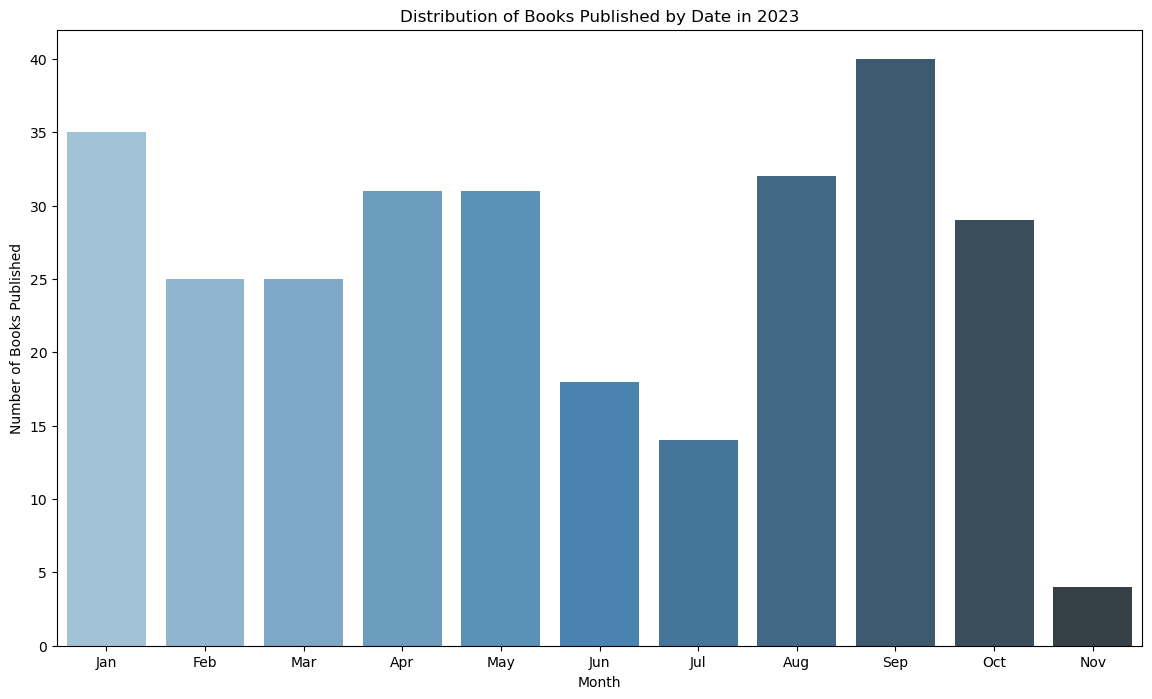

,Month,Title
0,Jan,35
1,Feb,25
2,Mar,25
3,Apr,31
4,May,31
5,Jun,18
6,Jul,14
7,Aug,32
8,Sep,40
9,Oct,29


In [54]:
import calendar
df['First Published date'] = pd.to_datetime(df['First Published date'])

#Get only the books from year 2023
books_2023 = df[df['First Published date'].dt.year == 2023]

#Count how many books released every month
books_per_month = books_2023.groupby(books_2023['First Published date'].dt.month)['Title'].count().reset_index()
books_per_month['Month'] = books_per_month['First Published date'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(14,8))
sns.barplot(data=books_per_month, x='Month', y='Title', palette='Blues_d')
plt.title('Distribution of Books Published by Date in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Books Published')
plt.show()

books_per_month[['Month','Title']]

**Observation** : 
1) From the plot, we found out that November has the least books released.
2) September and January are the month that have the most books released. 

<h4>Conclusion

In conclusion, the EDA of the Goodreads Choice Awards Best Books of 2023 provided valuable insights into reader preferences, popular genres, and key characteristics of highly-rated books. The analysis highlighted trends in the literary world and offered a comprehensive understanding of what made the winning book stand out. This information can help readers, authors, and publishers make informed decisions based on observed data patterns.